# Imports & General Settings

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Load dataset

In [3]:
df = pd.read_csv("Country-data.csv")

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
dataset = df.drop(["country"], axis=1)

In [7]:
dataset

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [8]:
scaled_dataset = StandardScaler().fit_transform(dataset)

In [9]:
print(scaled_dataset)

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


## Fit scaled dataset on DBSCAN modal (Epsilon-neighborhood = 1.2,  Min-points = 3)

In [49]:
model = DBSCAN(eps=1.2, min_samples=3).fit(scaled_dataset)

In [50]:
print(set(model.labels_))

{0, 1, 2, 3, -1}


In [51]:
df["cluster"] = model.labels_

In [52]:
df.groupby("cluster").count()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,,
-1,41,41,41,41,41,41,41,41,41,41
0,25,25,25,25,25,25,25,25,25,25
1,78,78,78,78,78,78,78,78,78,78
2,19,19,19,19,19,19,19,19,19,19
3,4,4,4,4,4,4,4,4,4,4


## -1 represent Noise, While cluster value >= 0 represent cluster number

In [53]:
df[df["country"].isin(["Germany", "Australia", "China", "Cameroon", "United States"])]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0
34,China,15.7,26.3,5.07,22.6,9530,6.940,74.6,1.59,4560,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,2
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400,-1


# Find the suitable eps value for DBSCAN model (min_sample = 5)

In [42]:
def find_suitable_eps(data):
    outlier_percent = []
    number_of_outliers = []

    for eps in np.linspace(0.001,3, 100):
        
        # Create Model
        dbscan = DBSCAN(eps=eps, min_samples=3)
        dbscan.fit(data)

        # Log Number of Outliers
        number_of_outliers.append(np.sum(dbscan.labels_ == -1))

        # Log percentage of points that are outliers
        outlier_percent.append(100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_))

    
    fig, ax =plt.subplots(1,2, figsize=(12,5))
    
    sns.lineplot(x=np.linspace(0.001,3, 100),y=outlier_percent, ax=ax[0])
    ax[0].set_ylabel("Percentage of Points Classified as Outliers")
    ax[0].set_xlabel("Epsilon Value")
    
    
    sns.lineplot(x=np.linspace(0.001,3,100),y=number_of_outliers, ax=ax[1])
    ax[1].set_ylabel("Number of Points Classified as Outliers")
    ax[1].set_xlabel("Epsilon Value")
    
#     ax[0].set_xlim(0.5, 2)
#     ax[0].set_ylim(5, 50)
    
#     ax[1].set_xlim(1, 2)
#     ax[1].set_ylim(0, 60)

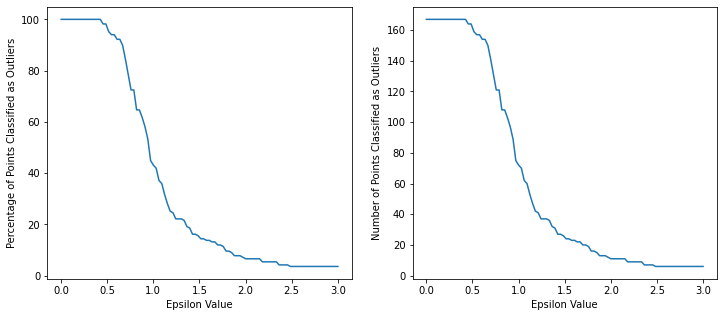

In [43]:
find_suitable_eps(scaled_dataset)